## Ejercicios, Parte II:

Adquisición y procesamiento de datos

Métodos de obtención de datos típicos en ingeniería civil, y fuentes de datos open-source útiles. HECHO
    
Limpieza y homogeneización de datasets: cambios de escala, datos faltantes y outliers. USO SIZE, NO HICE TODO
    
Visualización de datos continuos, discretos y cualitativos en Python: histogramas, boxplots, y gráficos de correlación. 
    GRAF: BARRA, LINEA, HIST

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset: Siniestros

In [5]:
df_siniestros = pd.read_csv('Victimas_siniestros_2015-2018.csv')
df_siniestros

C:\Users\l.martinez.gorbik\AppData\Local\Temp\ipykernel_2520\3451378312.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_siniestros = pd.read_csv('Victimas_siniestros_2015-2018.csv')


,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018,5/31/2018,20:00:00,NaN,...,1,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico"""
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018,5/31/2018,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33231,lesiones,NaN,NaN,NaN,NaN,5.0,2018,5/31/2018,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018,5/31/2018,14:15:00,NaN,...,1,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil


In [6]:
df_siniestros.columns

Index(['causa', 'rol', 'tipo', 'sexo', 'edad', 'mes', 'periodo', 'fecha',
       'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
       'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2',
       'codigo_calle', 'codigo_cruce', 'geocodificacion', 'semestre', 'x', 'y',
       'geom', 'cantidad_victimas', 'comuna', 'geom_3857', 'tipo_colision1',
       'participantes_victimas', 'participantes_acusados'],
      dtype='object')

Observando la columna llamada 'tipo', considera que puede corregirse alguna de las designaciones?

In [4]:
df_siniestros['tipo'].unique()

array(['moto', nan, 'peaton', 'camion', 'automovil', 'transporte publico',
       'auto pfa / movil / gendarmeria / metropolitana / moto movil',
       'utilitario', 'bicicleta', 'camioneta', 'taxi/remis', 'ambulancia',
       'fuerza seguridad', 'otros', 'cuatriciclo', 'autobomba',
       'traccion a sangre', 'vehiculo oficial', 'omnibus / minibus',
       'transporte de cargas / grua', 'transporte escolar',
       'tren / subte', 'patineta', 'vehiculo rural',
       'tren / subte / tranvia'], dtype=object)

In [5]:
df_siniestros['tipo'].value_counts()

moto                                                           13008
peaton                                                          7664
automovil                                                       6273
bicicleta                                                       2059
transporte publico                                              1473
taxi/remis                                                       899
camioneta                                                        343
camion                                                            98
utilitario                                                        85
fuerza seguridad                                                  57
auto pfa / movil / gendarmeria / metropolitana / moto movil       49
ambulancia                                                        41
transporte de cargas / grua                                       39
otros                                                             16
omnibus / minibus                 

In [6]:
df_siniestros['tipo'] = df_siniestros['tipo'].replace('tren / subte', 'tren / subte / tranvia')
df_siniestros['tipo'] = df_siniestros['tipo'].replace('auto pfa / movil / gendarmeria / metropolitana / moto movil', 'fuerza seguridad')

In [7]:
df_siniestros['tipo'].value_counts()

moto                           13008
peaton                          7664
automovil                       6273
bicicleta                       2059
transporte publico              1473
taxi/remis                       899
camioneta                        343
fuerza seguridad                 106
camion                            98
utilitario                        85
ambulancia                        41
transporte de cargas / grua       39
otros                             16
omnibus / minibus                 11
vehiculo oficial                   6
traccion a sangre                  4
autobomba                          2
transporte escolar                 2
tren / subte / tranvia             2
cuatriciclo                        1
patineta                           1
vehiculo rural                     1
Name: tipo, dtype: int64

Agrupar por rol/sexo:

In [8]:
causa = df_siniestros.groupby(['sexo', 'rol']).agg('size')
causa = pd.DataFrame(causa).rename(columns={0:'number'})
causa['percent'] = causa.groupby(level=0).apply(lambda x: 100*(x/x.sum()))
causa

number    percent
sexo      rol                                    
femenino  ciclista                 633   5.966632
          ciclista + peaton          3   0.028278
          conductor               2546  23.998492
          conductor + ciclista       4   0.037704
          conductor + pasajero       2   0.018852
          conductor + peaton        13   0.122537
          pasajero                3363  31.699500
          pasajero + peaton          5   0.047130
          peaton                  4040  38.080875
masculino ciclista                1244   5.588751
          ciclista + peaton          9   0.040433
          conductor              15078  67.738892
          conductor + ciclista      12   0.053911
          conductor + pasajero       8   0.035941
          conductor + peaton        19   0.085359
          pasajero                2126   9.551193
          pasajero + peaton         10   0.044926
          peaton                  3753  16.860596

Agrupar por año:

In [9]:
año = df_siniestros.groupby(['periodo']).agg('size')
año = pd.DataFrame(año).rename(columns={0:'number'})
año = año.reset_index()
año

,periodo,number
0,2015,9903
1,2016,9880
2,2017,9742
3,2018,3709


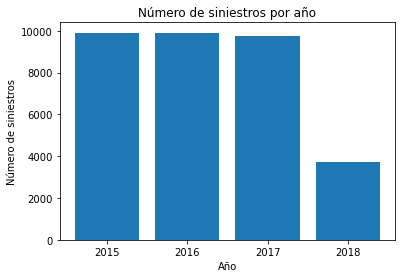

In [10]:
plt.xticks(range(len(año['periodo'].unique())), año['periodo'])
plt.bar(range(len(año['periodo'].unique())), año['number'])
plt.xlabel('Año')
plt.ylabel('Número de siniestros')
plt.title('Número de siniestros por año')
plt.show()

Agrupar por periodo/mes:

In [11]:
periodo = df_siniestros.groupby(['periodo', 'mes']).agg('size')
periodo = pd.DataFrame(periodo).rename(columns={0:'number'})
periodo['percent'] = periodo.groupby(level=0).apply(lambda x: 100*(x/x.sum()))
periodo = periodo.reset_index()
periodo

,periodo,mes,number,percent
0,2015,1.0,645,6.537604
1,2015,2.0,738,7.480235
2,2015,3.0,886,8.980337
3,2015,4.0,877,8.889114
4,2015,5.0,900,9.122238
5,2015,6.0,758,7.682952
6,2015,7.0,863,8.747213
7,2015,8.0,852,8.635719
8,2015,9.0,889,9.010744
9,2015,10.0,810,8.210014


In [12]:
periodo.pivot(index='periodo', columns='mes', values='number')

mes,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
periodo,,,,,,,,,,,,
2015,645.0,738.0,886.0,877.0,900.0,758.0,863.0,852.0,889.0,810.0,823.0,825.0
2016,673.0,734.0,914.0,791.0,951.0,898.0,784.0,841.0,814.0,839.0,859.0,782.0
2017,743.0,746.0,767.0,655.0,939.0,786.0,770.0,830.0,773.0,901.0,941.0,891.0
2018,683.0,681.0,836.0,734.0,775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
periodo.pivot(index='mes', columns='periodo', values='number')

periodo,2015,2016,2017,2018
mes,,,,
1.0,645.0,673.0,743.0,683.0
2.0,738.0,734.0,746.0,681.0
3.0,886.0,914.0,767.0,836.0
4.0,877.0,791.0,655.0,734.0
5.0,900.0,951.0,939.0,775.0
6.0,758.0,898.0,786.0,NaN
7.0,863.0,784.0,770.0,NaN
8.0,852.0,841.0,830.0,NaN
9.0,889.0,814.0,773.0,NaN


In [14]:
t = np.arange(1, 13, 1)
t2 = np.arange(1, 6, 1)
s1 = periodo['number'].where(periodo['periodo'] == 2015).dropna(how='all')
s2 = periodo['number'].where(periodo['periodo'] == 2016).dropna(how='all')
s3 = periodo['number'].where(periodo['periodo'] == 2017).dropna(how='all')
s4 = periodo['number'].where(periodo['periodo'] == 2018).dropna(how='all')

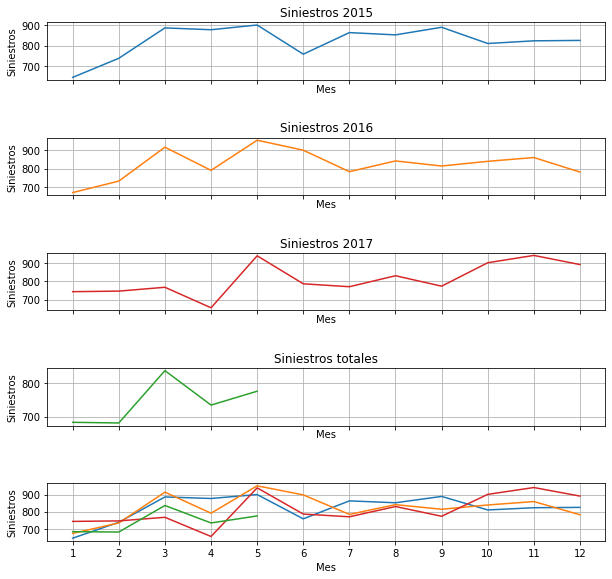

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(10,9), sharex=True)

axs[0].plot(t, s1, 'tab:blue')
axs[0].set_xticks(t)
axs[0].set_title('Siniestros 2015')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Siniestros')
axs[0].grid(True)

axs[1].plot(t, s2, 'tab:orange')
axs[1].set_xticks(t)
axs[1].set_title('Siniestros 2016')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Siniestros')
axs[1].grid(True)

axs[2].plot(t, s3, 'tab:red')
axs[2].set_xticks(t)
axs[2].set_title('Siniestros 2017')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Siniestros')
axs[2].grid(True)

axs[3].plot(t2, s4, 'tab:green')
axs[3].set_xticks(t)
axs[3].set_title('Siniestros 2018')
axs[3].set_xlabel('Mes')
axs[3].set_ylabel('Siniestros')
axs[3].grid(True)

axs[4].plot(t, s1, 'tab:blue', t, s2, 'tab:orange', t, s3, 'tab:red', t2, s4, 'tab:green')
axs[4].set_xticks(t)
axs[3].set_title('Siniestros totales')
axs[4].set_xlabel('Mes')
axs[4].set_ylabel('Siniestros')
axs[4].grid(True)


# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=1)

plt.show()

Agrupar por edad:

In [16]:
df_siniestros['edad'].unique()

array([ nan,  18.,  26.,  24.,  37.,  19.,  23.,  20.,  17.,  29.,  30.,
        14.,   7.,   1.,  10.,  41.,  43.,  38.,  22.,  60.,  35.,  36.,
        50.,  54.,  64.,  59.,  55.,  61.,  72.,  70.,  73.,  66.,  79.,
        81.,  83.,  82.,  95.,  16.,  44.,  13.,  31.,  28.,  32.,  34.,
        27.,  33.,  40.,  58.,  15.,  21.,  42.,  57.,  87.,  51.,  25.,
        53.,  46.,  80.,  65.,  39.,  69.,  63.,  68.,  75.,  76.,   5.,
        84.,  74.,  49.,   8.,  45.,   9.,  56.,   6.,  78.,  62.,  52.,
        47.,  71.,  12.,  48.,  67.,  11., 108.,  85.,   3.,  92.,  89.,
       102.,  77.,   2.,  86.,  93.,   4.,  88.,  90.,  91.,  96.,  94.,
       105.,  99., 100., 103., 106., 101.])

In [17]:
# create a list of our conditions
conditions = [
    (df_siniestros['edad'] <= 17),
    (df_siniestros['edad'] > 17) & (df_siniestros['edad'] <= 35),
    (df_siniestros['edad'] > 35) & (df_siniestros['edad'] <= 65),
    (df_siniestros['edad'] > 65)
    ]

# create a list of the values we want to assign for each condition
values = ['menor', 'joven_adulto', 'adulto', 'adulto_mayor']

# create a new column and use np.select to assign values to it using our lists as arguments
df_siniestros['grupo_etario'] = np.select(conditions, values)

# display updated DataFrame
df_siniestros.head()

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil,0
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN,0
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico""",0
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN,0
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion,0


In [19]:
#No tenemos la edad de todos, entonces si aparece NaN, quedó 0:
df_siniestros['grupo_etario'].unique()

array(['0', 'joven_adulto', 'adulto', 'menor', 'adulto_mayor'],
      dtype=object)

In [24]:
df_joven = df_siniestros.where(df_siniestros['grupo_etario'] == 'joven_adulto').dropna(how='all')
df_joven

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario
6,homicidio,conductor,moto,masculino,18.0,1.0,2015.0,01-01-15,2:20:00,piedras y av independencia,...,-58.377362,-34.617451,0101000020E6100000321A04664D304DC00ACBACA3084F...,1.0,1.0,0101000020110F00005859A78D3ACA58C1C303A885475F...,motovehiculo - vehiculo,moto,automovil,joven_adulto
7,lesiones,pasajero,automovil,masculino,26.0,1.0,2015.0,01-01-15,7:10:00,2850 yerbal,...,-58.469471,-34.629286,0101000020E61000009B159BA0173C4DC000EC376E8C50...,1.0,7.0,0101000020110F0000A198A1EF3DD458C122046FFB6762...,vehiculo - vehiculo,automovil,automovil,joven_adulto
8,homicidio,conductor,moto,masculino,24.0,3.0,2015.0,3/14/2015,4:30:00,av gral paz colectora y jorge chavez,...,-58.528416,-34.650157,0101000020E61000007F0ED022A3434DC09D58EF5A3853...,1.0,9.0,0101000020110F000032A9EF5DA6DA58C1C5A834FCEB67...,motovehiculo - motovehiculo,moto,moto,joven_adulto
11,homicidio,pasajero,automovil,masculino,19.0,8.0,2015.0,8/14/2015,2:30:00,av pte figueroa alcorta y av de los ombues,...,-58.427485,-34.559184,0101000020E6100000E4E8EED0B7364DC0241D69549347...,3.0,14.0,0101000020110F00005A538B75ADCF58C136F04314E44F...,vehiculo - vehiculo,automovil,automovil,joven_adulto
12,homicidio,pasajero,automovil,masculino,23.0,8.0,2015.0,8/14/2015,2:30:00,av pte figueroa alcorta y av de los ombues,...,-58.427485,-34.559184,0101000020E6100000E4E8EED0B7364DC0241D69549347...,3.0,14.0,0101000020110F00005A538B75ADCF58C136F04314E44F...,vehiculo - vehiculo,automovil,automovil,joven_adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33226,lesiones,conductor,transporte publico,masculino,31.0,5.0,2018.0,5/30/2018,18:30:00,NaN,...,-58.414094,-34.618237,0101000020E61000003C82730B01354DC0A9D20465224F...,2.0,5.0,0101000020110F0000B71F7ACF38CE58C1E1916AAE7C5F...,multiple,"""transporte publico"",automovil",automovil,joven_adulto
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018.0,5/31/2018,20:00:00,NaN,...,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1.0,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",joven_adulto
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018.0,5/31/2018,9:30:00,NaN,...,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2.0,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil",joven_adulto
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018.0,5/31/2018,14:15:00,NaN,...,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1.0,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil,joven_adulto


(array([1188.,  782., 1967., 1056., 2226., 1139., 1069., 1990., 1249.,
        1792.,  798., 1733.]),
 array([18.        , 19.41666667, 20.83333333, 22.25      , 23.66666667,
        25.08333333, 26.5       , 27.91666667, 29.33333333, 30.75      ,
        32.16666667, 33.58333333, 35.        ]),
 <BarContainer object of 12 artists>)

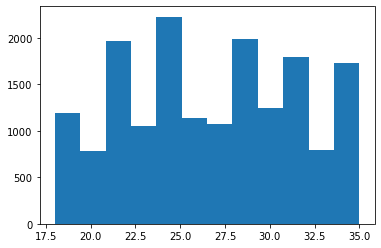

In [38]:
#probar con distintos bins: 3, 6, 12
plt.hist(df_joven['edad'], bins=12)

In [39]:
df_joven['edad'].describe()

count    16989.000000
mean        26.729178
std          4.818198
min         18.000000
25%         23.000000
50%         27.000000
75%         31.000000
max         35.000000
Name: edad, dtype: float64

Agrupar por tipo de calle:

In [40]:
df_siniestros['tipo_calle'].unique()

array(['calle', 'avenida', 'autopista'], dtype=object)

In [46]:
(df_siniestros['tipo_calle']=='calle').describe()

count     33234
unique        2
top       False
freq      21547
Name: tipo_calle, dtype: object

Agregar los barrios segun la comuna:

In [128]:
#descargo en html desde el link de wikipedia:
comuna = pd.read_html("Comunas de la ciudad de Buenos Aires - Wikipedia, la enciclopedia libre.html")[0]
comuna

,Comuna,Año creación,Origen,Población (2010) [4]​,Superficie (km²)[5]​,Barrios[2]​,Códigos INDEC:divisiones político-administrativas/ gobiernos locales[6]​[7]​
0,Comuna 1,2005,A partir de la sanción de la Ley 1777Límites f...,205 886,174,"Retiro, San Nicolás, Puerto Madero, San Telmo,...",02007/ 022007
1,Comuna 2,2005,A partir de la sanción de la Ley 1777Límites f...,157 932,61,Recoleta,02014/ 022014
2,Comuna 3,2006,A partir de la sanción de la Ley 1777Límites f...,187 537,64,San Cristóbal y Balvanera,02021/ 022021
3,Comuna 4,2005,A partir de la sanción de la Ley 1777Límites f...,218 245,216,"Boca, Barracas, Parque Patricios y Nueva Pompeya",02028/ 022028
4,Comuna 5,2005,A partir de la sanción de la Ley 1777Límites f...,179 005,67,Almagro y Boedo,02035/ 022035
5,Comuna 6,2005,A partir de la sanción de la Ley 1777Límites f...,176 076,68,Caballito,02042/ 022042
6,Comuna 7,2005,A partir de la sanción de la Ley 1777Límites f...,220 591,124,Flores y Parque Chacabuco,02049/ 022049
7,Comuna 8,2005,A partir de la sanción de la Ley 1777Límites f...,187 237,219,"Villa Soldati, Villa Riachuelo y Villa Lugano",02056/ 022056
8,Comuna 9,2005,A partir de la sanción de la Ley 1777Límites f...,161 797,168,"Parque Avellaneda, Liniers y Mataderos",02063/ 022063
9,Comuna 10,2005,A partir de la sanción de la Ley 1777Límites f...,166 022,127,"Villa Real, Monte Castro, Versalles, Floresta,...",02070/ 022070


In [129]:
comuna.columns

Index(['Comuna', 'Año creación', 'Origen', 'Población (2010) [4]​',
       'Superficie (km²)[5]​', 'Barrios[2]​',
       'Códigos INDEC:divisiones político-administrativas/ gobiernos locales[6]​[7]​'],
      dtype='object')

In [130]:
comuna = comuna[['Comuna', 'Población (2010) [4]​', 'Superficie (km²)[5]​', 'Barrios[2]​']]
comuna = comuna.rename(columns={'Comuna': 'comuna',
                                'Población (2010) [4]​': 'Población', 
                                'Superficie (km²)[5]​': 'Superficie', 
                                'Barrios[2]​': 'Barrios'})
comuna['comuna'] = comuna['comuna'].str.split().str[-1].astype(int)
comuna

,comuna,Población,Superficie,Barrios
0,1,205 886,174,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
1,2,157 932,61,Recoleta
2,3,187 537,64,San Cristóbal y Balvanera
3,4,218 245,216,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
4,5,179 005,67,Almagro y Boedo
5,6,176 076,68,Caballito
6,7,220 591,124,Flores y Parque Chacabuco
7,8,187 237,219,"Villa Soldati, Villa Riachuelo y Villa Lugano"
8,9,161 797,168,"Parque Avellaneda, Liniers y Mataderos"
9,10,166 022,127,"Villa Real, Monte Castro, Versalles, Floresta,..."


In [131]:
df_siniestros_nuevo = df_siniestros.merge(comuna, how='left', on='comuna')
df_siniestros_nuevo

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario,Población,Superficie,Barrios
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil,0,161 797,168.0,"Parque Avellaneda, Liniers y Mataderos"
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN,0,231 331,146.0,"Belgrano, Núñez y Colegiales"
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico""",0,187 537,64.0,San Cristóbal y Balvanera
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN,0,205 886,174.0,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion,0,182 574,143.0,"Chacarita, Villa Crespo, Paternal, Villa Ortúz..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018,5/31/2018,20:00:00,NaN,...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico""",joven_adulto,205 886,174.0,"Retiro, San Nicolás, Puerto Madero, San Telmo,..."
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018,5/31/2018,9:30:00,NaN,...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil",joven_adulto,182 574,143.0,"Chacarita, Villa Crespo, Paternal, Villa Ortúz..."
33231,lesiones,NaN,NaN,NaN,NaN,5.0,2018,5/31/2018,9:30:00,NaN,...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil",0,182 574,143.0,"Chacarita, Villa Crespo, Paternal, Villa Ortúz..."
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018,5/31/2018,14:15:00,NaN,...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil,joven_adulto,182 574,143.0,"Chacarita, Villa Crespo, Paternal, Villa Ortúz..."


In [133]:
df_siniestros_nuevo.where(df_siniestros_nuevo['Barrios'].str.contains('Boca', regex=False)).dropna(how='all')

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario,Población,Superficie,Barrios
15,homicidio,pasajero,automovil,femenino,23.0,2.0,2017.0,2/26/2017,5:15:00,av. perito moreno y fournier,...,2.0,4.0,0101000020110F0000FC052A69B1CE58C1CD201B2BD367...,vehiculo - vehiculo,automovil,automovil,joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
37,homicidio,pasajero,moto,femenino,19.0,2.0,2016.0,2/14/2016,22:00:00,av regimiento de patricios y quinquela martin ...,...,1.0,4.0,0101000020110F00000D9E46054DC958C1C815A8520266...,motovehiculo - vehiculo,moto,automovil,joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
45,homicidio,peaton,peaton,masculino,36.0,6.0,2017.0,6/25/2017,22:40:00,av. entre rios y av. brasil,...,1.0,4.0,0101000020110F0000BD3E7F1CB4CB58C1E620C9C76A62...,peaton - vehiculo,peaton,automovil,adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
83,homicidio,conductor,automovil,masculino,19.0,2.0,2017.0,2/26/2017,5:15:00,av. perito moreno y fournier,...,2.0,4.0,0101000020110F0000FC052A69B1CE58C1CD201B2BD367...,vehiculo - vehiculo,automovil,automovil,joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
95,homicidio,peaton,peaton,femenino,29.0,11.0,2016.0,11-09-16,20:00:00,pichincha y av brasil,...,1.0,4.0,0101000020110F000000DE0F8348CC58C1ED9E7B0AB162...,peaton - vehiculo,peaton,"""transporte publico""",joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33179,lesiones,peaton,peaton,femenino,42.0,5.0,2018.0,5/21/2018,21:00:00,NaN,...,1.0,4.0,0101000020110F0000C34F63A53BCE58C14C11A09A5468...,peaton - vehiculo,peaton,"""transporte publico""",adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
33202,lesiones,pasajero,automovil,femenino,20.0,5.0,2018.0,5/24/2018,5:00:00,NaN,...,1.0,4.0,0101000020110F0000B07C4D670CC958C167E175E74067...,vehiculo - vehiculo,automovil,automovil,joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
33221,lesiones,conductor,automovil,femenino,40.0,5.0,2018.0,5/29/2018,14:14:00,NaN,...,1.0,4.0,0101000020110F0000B43CDAEB07C958C1020EF4EAE964...,vehiculo - vehiculo,automovil,automovil,adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
33222,lesiones,conductor,moto,masculino,34.0,5.0,2018.0,5/29/2018,19:50:00,NaN,...,1.0,4.0,0101000020110F000041E268696CC958C1B1946A9E1064...,motovehiculo - vehiculo,moto,automovil,joven_adulto,218 245,216.0,"Boca, Barracas, Parque Patricios y Nueva Pompeya"
